<a target="_blank" href="https://colab.research.google.com/github/sonder-art/neuroscience/blob/main/20_fc_vectors.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
# !pip install requests

In [5]:
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

import requests
import os

In [18]:
# Local path
series_path = 'data/input/subject_timeseries/'

Execute the cell below if you are on `Colab` if you are running this folder locally then there is no need for downloading the data.

In [ ]:
# Github Path
 
# List of raw URLs of the .npy files
file_urls = [
    f"https://github.com/sonder-art/neuroscience/raw/main/data/input/subject_timeseries/n00{i}.npy"
    for i in range(1,10)
] +  [
    f"https://github.com/sonder-art/neuroscience/raw/main/data/input/subject_timeseries/n0{i}.npy"
    for i in range(10,51)
]

# Ensure the save folder exists
os.makedirs(series_path, exist_ok=True)

for url in file_urls:
    # Extract the file name
    file_name = url.split('/')[-1]
    
    # Full path for saving the file
    save_path = os.path.join(series_path, file_name)

    # Download and save the file
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_name}")
    else:
        print(f"Failed to download {file_name}")


In [8]:
files = np.sort(os.listdir(series_path))
print(f'Files: {len(files)}')
files[0]
paths = [series_path + file for file in files]

Files: 50


In [9]:
paths[:5]

['data/input/subject_timeseries/n001.npy',
 'data/input/subject_timeseries/n002.npy',
 'data/input/subject_timeseries/n003.npy',
 'data/input/subject_timeseries/n004.npy',
 'data/input/subject_timeseries/n005.npy']

In [10]:
series = []
subject_id = []
for file in paths:
    name = file.split('/')[-1][:4]
    subject_id.append(name)
    data = np.load(file)
    series.append(data)
print(f'allSeries: {len(series)}')
print(f'Series shape: {data.shape}')

allSeries: 50
Series shape: (332, 610)


In [11]:
name 

'n050'

In [12]:
FCs = []
t = 1
for s in series:
    corr = np.corrcoef(s)
    FCs.append(corr)
    t += 1
print('all FCs: ', len(FCs), FCs[0].shape)

all FCs:  50 (332, 332)


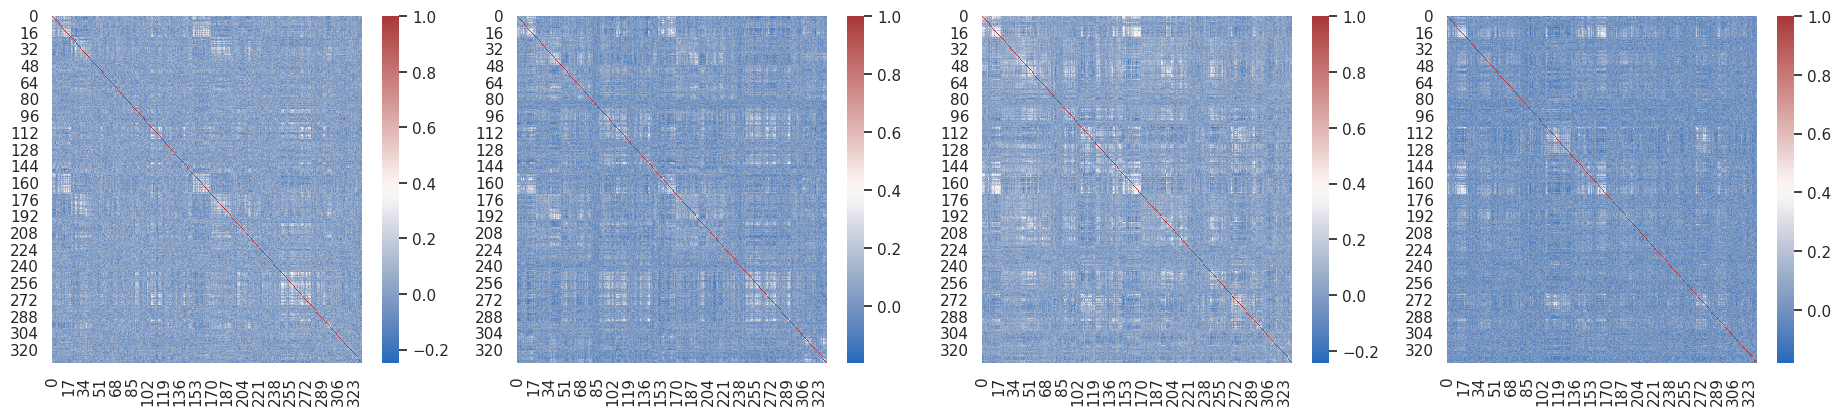

In [13]:
fig = plt.figure(figsize=(23,4.5))

for i, m in enumerate(FCs[:4]):
    axes = fig.add_subplot(1, 4, i+1)
    sns.heatmap(m, cmap='vlag')

## Vectorization

The next cell can only be executed if you are running the notebook locally, if you are in `Colab` skip it.

In [14]:
#from utils.brain import upper_vectorization

In [ ]:
import numpy as np
def upper_vectorization(A:np.array):
    triangle = np.triu(A, 1)
    vector = triangle[np.triu_indices(triangle.shape[0], 1)]

    return vector


def matrix_from_vector(v, n):
    matrix = np.zeros((n, n))
    i_upp = np.triu_indices(n, 1)
    matrix[i_upp] = v
    i_low = np.tril_indices(n, -1)
    matrix[i_low] = matrix.T[i_low]
    
    return matrix

In [15]:
vectors = []
for m in FCs:
    m_vec = upper_vectorization(m)
    vectors.append(m_vec)
    
vectors = np.array(vectors)
print(f'All vecs: {vectors.shape}')

All vecs: (50, 54946)


In [16]:
stackedVecs = np.array(vectors)
stackedVecs.shape

(50, 54946)

In [17]:
np.save('data/output/subject_brain_vectors', stackedVecs)